In [3]:
library(SingleCellExperiment)
library(ggplot2)

In [2]:
## input files folder
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/input_files/DA_D52/"

In [4]:
### Neuroseq 10x data
### DA D52 (untreated)
### meta-cells
sce = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/pseudocells_Danai/Pseudobulk_per_donor_DA_D52untreated_Leiden_res34_sce.rds")

In [5]:
sce

class: SingleCellExperiment 
dim: 32738 3204 
metadata(0):
assays(1): counts
rownames(32738): ENSG00000243485 ENSG00000237613 ... ENSG00000215616
  ENSG00000215611
rowData names(0):
colnames(3204): paim_1-d52_untr-cluster0 paim_1-d52_untr-cluster1 ...
  vass_1-d52_untr-cluster10 vass_1-d52_untr-cluster11
colData names(8): celltype donor_id ... donor pseudocell
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [6]:
## make sample mapping file
df = data.frame(genotype_individual_id = sce$donor_id,
                phenotype_sample_id = colnames(sce))
head(df,2)

genotype_individual_id,phenotype_sample_id
HPSI0115i-paim_1,paim_1-d52_untr-cluster0
HPSI0115i-paim_1,paim_1-d52_untr-cluster1


In [7]:
smf_filename = paste0(mydir,"sample_mapping_file.csv")
write.csv(df, smf_filename, quote = F, row.names = F)

In [8]:
## make phenotype file

In [9]:
counts(sce)[1:5,1:5]

,paim_1-d52_untr-cluster0,paim_1-d52_untr-cluster1,paim_1-d52_untr-cluster2,paim_1-d52_untr-cluster3,paim_1-d52_untr-cluster4
ENSG00000243485,0,0,0.00000000,0.00000000,0
ENSG00000237613,0,0,0.00000000,0.00000000,0
ENSG00000186092,0,0,0.00000000,0.00000000,0
ENSG00000238009,0,0,0.04155971,0.04906666,0
ENSG00000239945,0,0,0.00000000,0.00000000,0


In [10]:
df_pheno = as.data.frame(counts(sce))
pheno_filename = paste0(mydir,"phenotype.csv")
write.csv(df_pheno, pheno_filename, quote = F)

In [14]:
## make env file (PCs)

In [11]:
logcounts(sce) = counts(sce)

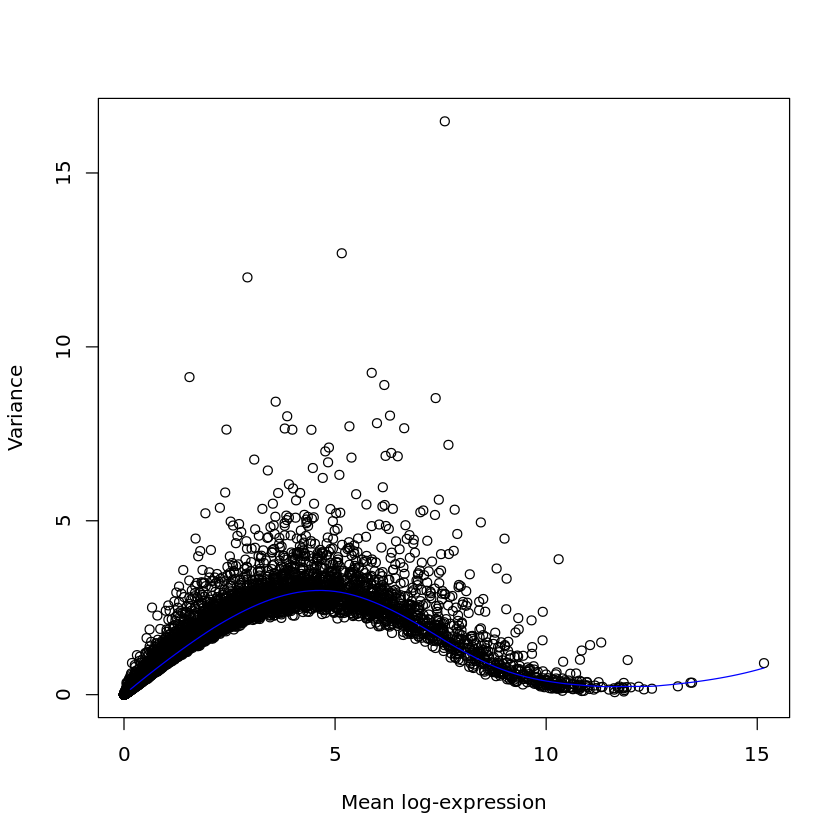

In [12]:
dec1 <- scran::modelGeneVar(sce)
plot(dec1$mean, dec1$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec1)$trend(x), col="blue", add=TRUE)

In [13]:
top.500.hvgs = rownames(dec1[order(dec1$bio, decreasing = TRUE),][1:500,])

In [14]:
pcs = prcomp(t(df_pheno[top.500.hvgs,]))
summary(pcs)

Importance of components:
                           PC1      PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     22.0453 10.94809 9.54722 9.1907 6.64811 5.88935 5.79263
Proportion of Variance  0.2566  0.06329 0.04813 0.0446 0.02334 0.01831 0.01772
Cumulative Proportion   0.2566  0.31992 0.36805 0.4127 0.43599 0.45430 0.47202
                           PC8     PC9   PC10    PC11    PC12  PC13    PC14
Standard deviation     5.75368 5.21417 4.8268 4.42458 4.24408 4.128 3.91405
Proportion of Variance 0.01748 0.01436 0.0123 0.01034 0.00951 0.009 0.00809
Cumulative Proportion  0.48950 0.50386 0.5162 0.52650 0.53601 0.545 0.55310
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     3.80171 3.69006 3.66373 3.41100 3.27112 3.10614 3.05843
Proportion of Variance 0.00763 0.00719 0.00709 0.00614 0.00565 0.00509 0.00494
Cumulative Proportion  0.56073 0.56792 0.57501 0.58115 0.58680 0.59189 0.59683
                          PC22    PC23

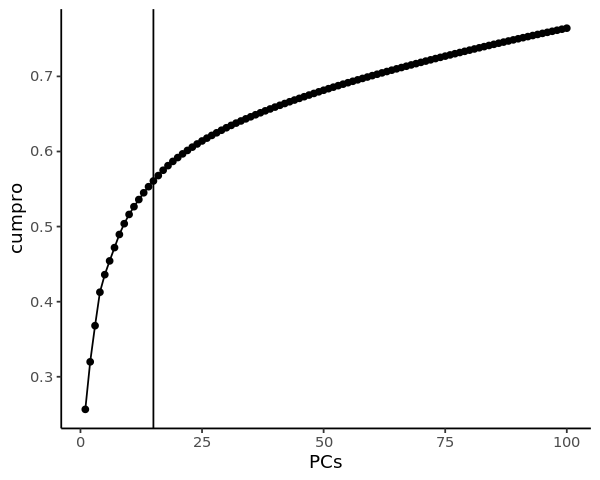

In [15]:
N = 100
x = 15
df0 = data.frame(PCs = 1:N,
                 cumpro = summary(pcs)$importance[3,1:N])
# head(df0)
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df0, aes(x = PCs, y = cumpro)) + geom_point() + geom_line() + theme_classic() + 
    geom_vline(xintercept = x)

In [16]:
df_pca = pcs$x
df_pca[1:5,1:5]

,PC1,PC2,PC3,PC4,PC5
paim_1-d52_untr-cluster0,-37.51201,6.393855,3.4549739,8.8250328,3.6020418
paim_1-d52_untr-cluster1,-52.66178,-8.705860,0.4804639,-6.7316774,1.8874376
paim_1-d52_untr-cluster2,17.62014,-0.397304,-4.0925133,-0.2872843,5.4398487
paim_1-d52_untr-cluster3,-56.95988,-16.135813,-1.4343410,-13.1641125,-1.3195784
paim_1-d52_untr-cluster4,-24.19528,1.583333,8.1225600,12.1550785,0.0964694


In [17]:
env_filename = paste0(mydir,"10PCs.csv")
write.csv(df_pca[,1:10], env_filename, quote = F)

In [18]:
env_filename = paste0(mydir,"15PCs.csv")
write.csv(df_pca[,1:15], env_filename, quote = F)

In [19]:
env_filename = paste0(mydir,"20PCs.csv")
write.csv(df_pca[,1:20], env_filename, quote = F)

In [20]:
## make feature-variant filter file

In [21]:
fvf_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_Storey.csv"
df_fvf = read.csv(fvf_filename, row.names = 1)
head(df_fvf,2)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


In [22]:
df_fvf_DA = df_fvf[df_fvf$label == "DA_D52",]
nrow(df_fvf_DA)
head(df_fvf_DA,2)

[1] 1024

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
20,9_94639418_T_A,1.322391e-08,-0.8341359,0.14677361,0.0004332491,9,94794281,94877666,175,175,...,9,94639418,A,1,0.05428571,1.0000000,ENSG00000090054,0.008492531,0.004996835,DA_D52
221,9_91743809_C_T,6.101031e-09,-0.5494673,0.09450819,0.0004317183,9,91926113,91931618,175,175,...,9,91743809,T,1,0.07142857,0.6024874,ENSG00000123975,0.008476351,0.004987315,DA_D52


In [23]:
unique(as.character(df_fvf_DA$label))

[1] "DA_D52"

In [24]:
DA_fvf = df_fvf_DA[,c("snp_id","feature_id")]
colnames(DA_fvf)[2] = "feature"
head(DA_fvf,2)

,snp_id,feature
20,9_94639418_T_A,ENSG00000090054
221,9_91743809_C_T,ENSG00000123975


In [25]:
fvf_filename = paste0(mydir,"DA_D52_eqtl_FDR5pct.csv")
write.csv(DA_fvf, fvf_filename, quote = F, row.names = F)